In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [23]:
mub = 927.4009*1e-26 #Bohr magneton [J/T]
h = 6.62607*1e-34 #Planck's constant [Js]
muo = 4*np.pi*1e-7

R = 15.8*1e-2#Coil radius [m]
N = 154 #Coil turns

## RF Depumping

In [24]:
Rf = np.array([98.335, 48.815, 64.904, 75.932, 87.133, 112.03, 123.30, 137.240, 150.148, 159.998, 169.021])*1e3 #Hz
V_Rb87 = np.array([381.1, 268.6, 303.9, 329.2, 355.0, 412, 438, 471, 501, 523, 544])*1e-3 #Resonant dip voltage [V]
V_Rb85 = np.array([494, 326.4, 379.0, 416, 455, 542, 581, 629, 674, 709, 740])*1e-3 #Resonant dip voltage [V]
dV = 0.2*1e-3 #0.2 mV uncertainty

I_Rb87 = V_Rb87/1; #1 Ohm resistor to coils
I_Rb85 = V_Rb85/1; #1 Ohm resistor to coils

E_Rf = h*Rf #RF photon energy

In [25]:
def BField(I):
    return 16*muo*N*I/(np.sqrt(125)*2*R)

In [26]:
B_Rb87 = BField(I_Rb87)
B_Rb85 = BField(I_Rb85)

### $^{87}$Rb

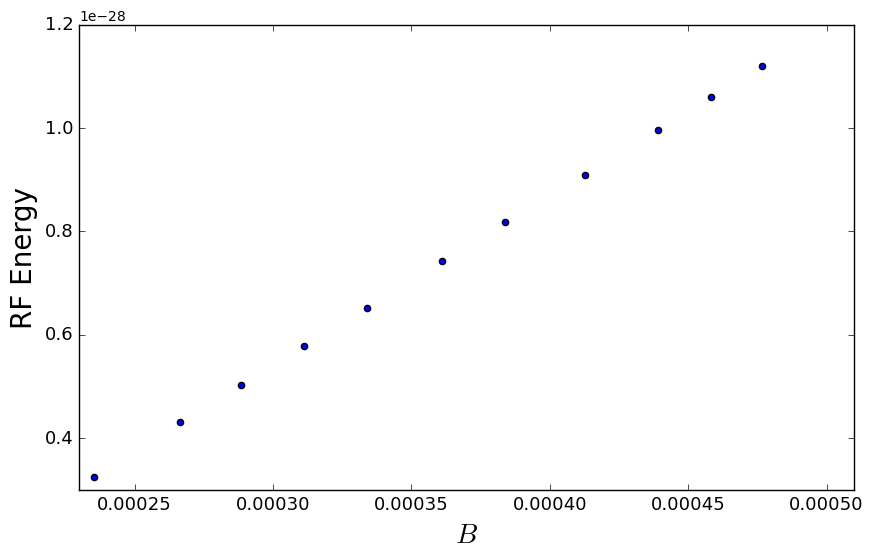

In [27]:
plt.figure(figsize=(10,6));
plt.scatter(B_Rb87,E_Rf);

plt.xlabel('$B$',fontsize=20);
plt.ylabel('RF Energy',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(2.3e-4,5.1*1e-4);
plt.ylim(3e-29,1.2e-28);
#plt.savefig('Sample')

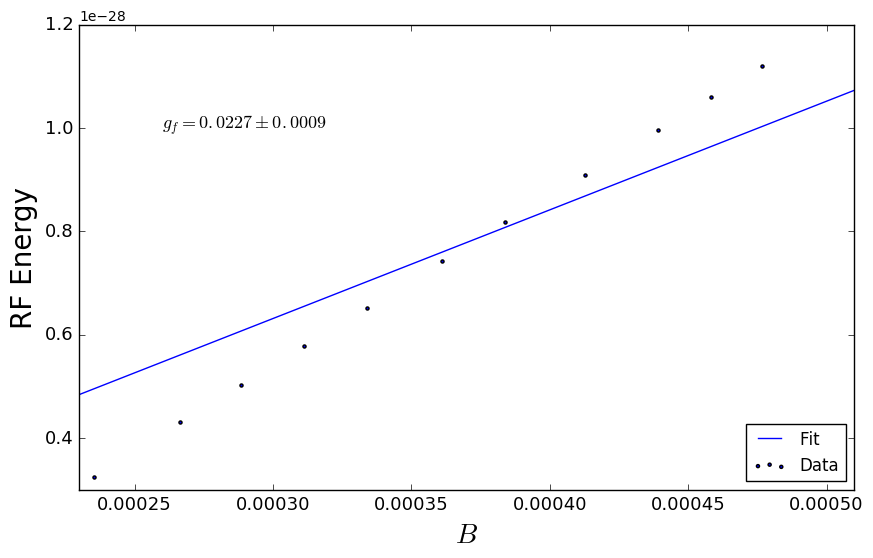

In [38]:
def myfun(B,k):
    ans =  k*B #DeltaE for Zeeman
    return ans

p0 = [0.5*mub] #guess

xspace = np.linspace(2.3e-4,5.1e-4) 

plsq, pcov = curve_fit(myfun, B_Rb87, E_Rf, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
k = plsq[0]
ek = np.sqrt(pcov[0,0])

yfit = myfun(xspace,plsq[0])  # use fit results for a, b, c

plt.figure(figsize=(10,6));

plt.scatter(B_Rb87,E_Rf,marker='.',label='Data');
plt.plot(xspace,yfit,label='Fit')

plt.legend(loc='lower right')
plt.xlabel('$B$',fontsize=20);
plt.ylabel('RF Energy',fontsize = 20);
plt.text(2.6e-4,1e-28,'$g_f = %.4f \pm %.4f$' % (plsq[0]/mub, np.sqrt(pcov[0,0])/mub),size=13)
plt.xticks(size = 13);
plt.xlim(2.3e-4,5.1*1e-4);
plt.ylim(3e-29,1.2e-28);
plt.yticks(size = 13);

### $^{85}$Rb

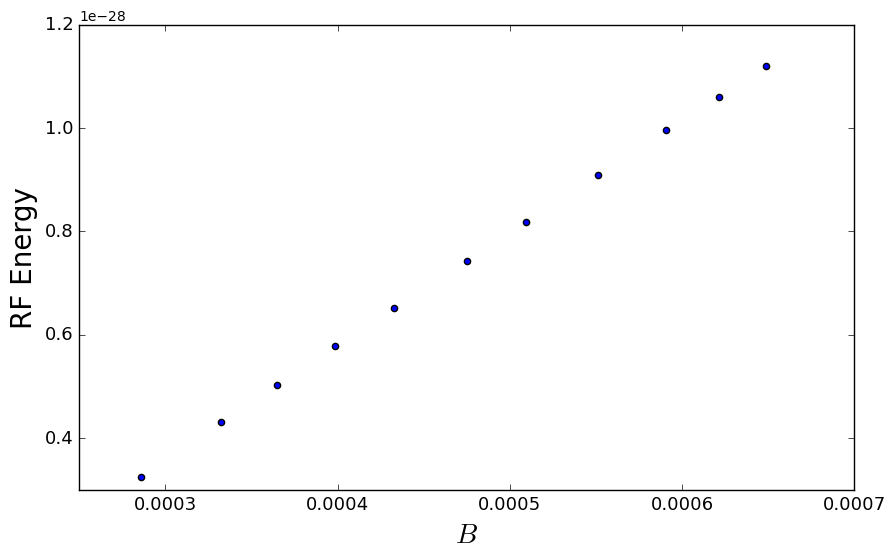

In [29]:
plt.figure(figsize=(10,6));
plt.scatter(B_Rb85,E_Rf);

plt.xlabel('$B$',fontsize=20);
plt.ylabel('RF Energy',fontsize = 20);
plt.xticks(size = 13);
plt.xlim(2.5e-4,7e-4);
plt.ylim(3e-29,1.2e-28);
plt.yticks(size = 13);
#plt.savefig('Sample')

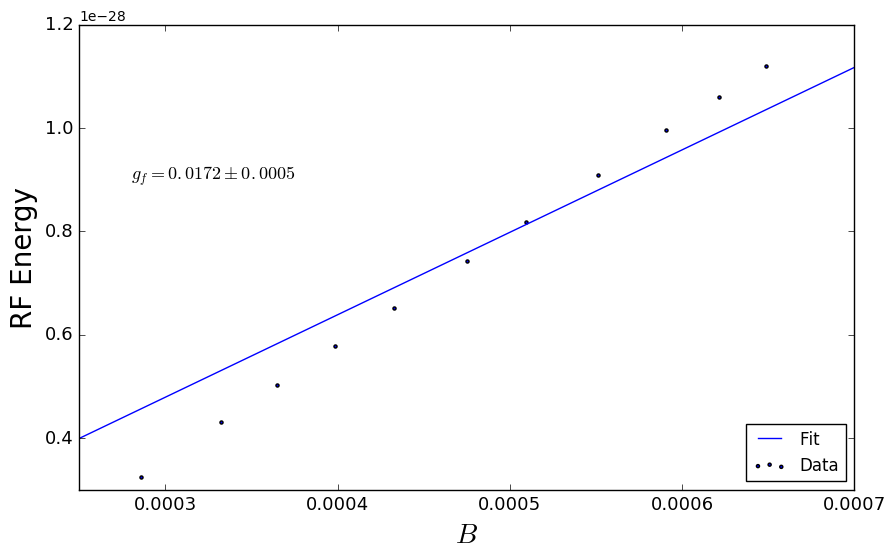

In [30]:
def myfun(B,gf):
    ans =  gf*mub*B #DeltaE for Zeeman
    return ans

p0 = [0.5] #guess

xspace = np.linspace(2.5e-4,7e-4)

plsq, pcov = curve_fit(myfun, B_Rb85, E_Rf, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
gf = plsq[0]
egf = np.sqrt(pcov[0,0])

yfit = myfun(xspace,plsq[0])  # use fit results for a, b, c

plt.figure(figsize=(10,6));

plt.scatter(B_Rb85,E_Rf,marker='.',label='Data');
plt.plot(xspace,yfit,label='Fit')

plt.legend(loc='lower right')
plt.xlabel('$B$',fontsize=20);
plt.ylabel('RF Energy',fontsize = 20);
plt.text(2.8e-4,9e-29,'$g_f = %.4f \pm %.4f$' % (plsq[0], np.sqrt(pcov[0,0])),size=13)
plt.xticks(size = 13);
plt.xlim(2.5e-4,7e-4);
plt.ylim(3e-29,1.2e-28);
plt.yticks(size = 13);

### Dip Angle

In [40]:
V_Vertical = 0.3729 #Volts, cancel Earth's vertical field.
I_Vertical = V_Vertical/1 #1 Ohm
B_Vertical = BField(I_Vertical)
B_Vertical

0.00032681415747530805

In [41]:
V_Horizontal = 0.1634 #Volts, cancel Earth's vertical field.
I_Horizontal = V_Horizontal/1 #1 Ohm
B_Horizontal = BField(I_Horizontal)
B_Horizontal

0.00014320577455474744

Measured inside 90-72.5. Lobby 90-83.

# Rapid Field Switching

### $^{87}$Rb

In [50]:
T87 = np.array([3.4, 2.4, 2.2, 1.9, 4.5, 2.8])*1e-3 #Period in seconds
RFAmp87 = np.array([.602, .840, .920, 1.01, .480, .720]) #Read from oscope Volts
BRF87 = RFAmp87/50

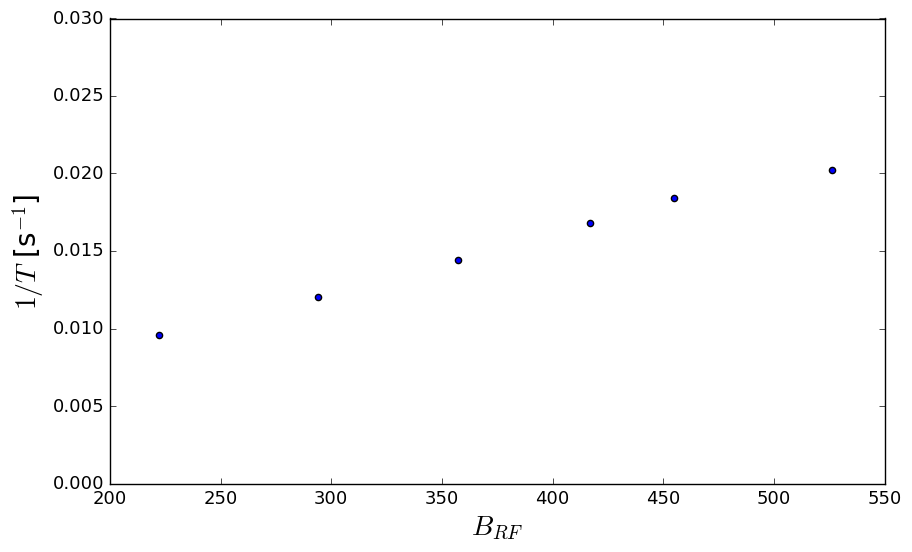

In [54]:
plt.figure(figsize=(10,6));
plt.scatter(1/T87,BRF87);

plt.xlabel('$B_{RF}$',fontsize=20);
plt.ylabel('$1/T$ [s$^{-1}$]',fontsize = 20);
plt.xticks(size = 13);
#plt.xlim(2.5e-4,7e-4);
#plt.ylim(3e-29,1.2e-28);
plt.yticks(size = 13);
#plt.savefig('Sample')

### $^{85}$Rb

In [52]:
T85 = np.array([4.3, 3.5, 3.3, 2.8, 2.7])*1e-3 #Period in seconds
RFAmp85 = np.array([.720, .820, .920, 1.01, 1.11]) #Read from oscope Volts
BRF85 = RFAmp85/50

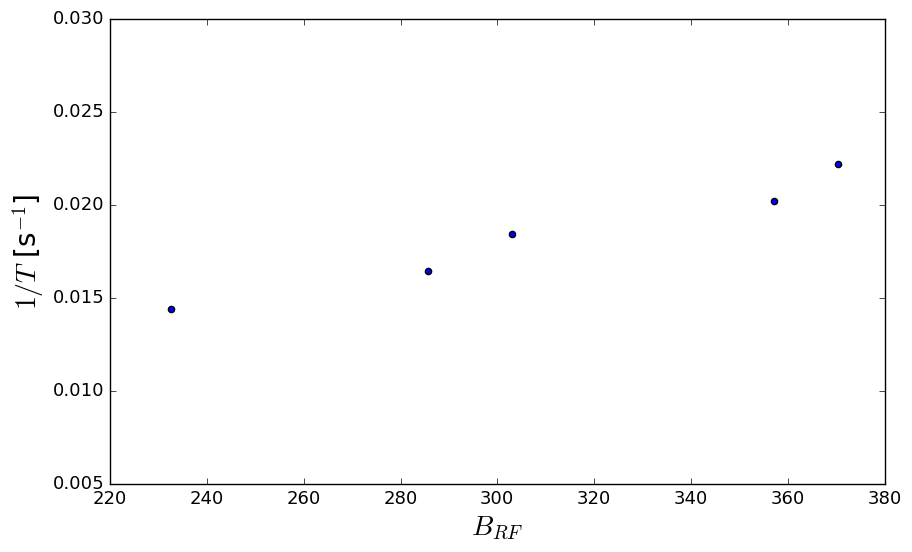

In [55]:
plt.figure(figsize=(10,6));
plt.scatter(1/T85,BRF85);

plt.xlabel('$B_{RF}$',fontsize=20);
plt.ylabel('$1/T$ [s$^{-1}$]',fontsize = 20);
plt.xticks(size = 13);
#plt.xlim(2.5e-4,7e-4);
#plt.ylim(3e-29,1.2e-28);
plt.yticks(size = 13);
#plt.savefig('Sample')

Pretty large uncertainty here, rushed measurements

## Rise time

Need picture